Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() 
(raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/ipywidgets/w
idgets/widget_output.py:112)

╭──────── 🎉 Flow is ready to serve! ─────────╮
│  🔗         Protocol                GRPC    │
│  🏠     Local access       ]8;id=838937;GRPC://0.0.0.0:62009\0.0.0.0]8;;\]8;id=838937;GRPC://0.0.0.0:62009\:]8;;\]8;id=838937;GRPC://0.0.0.0:62009\62009]8;;\    │
│  🔒  Private network    ]8;id=629269;GRPC://10.0.0.108:62009\10.0.0.108]8;;\]8;id=629269;GRPC://10.0.0.108:62009\:]8;;\]8;id=629269;GRPC://10.0.0.108:62009\62009]8;;\    │
│  🌍   Public address  ]8;id=903559;GRPC://24.4.218.237:62009\24.4.218.237]8;;\]8;id=903559;GRPC://24.4.218.237:62009\:]8;;\]8;id=903559;GRPC://24.4.218.237:62009\62009]8;;\    │
╰─────────────────────────────────────────────╯

Deprecation: 'getPageImageList' removed from class 'Document' after v1.19 - use 'get_page_images'. (raised from /Users/peppermint/.pyenv/versions/3.7.2/lib/python3.7/site-packages/fitz/__init__.py:170)


╭──────────────────────── Documents Summary ─────────────────────────╮
│                                                                    │
│   Length                    1                                      │
│   Homogenous Documents      True                                   │
│   Has nested Documents in   ('chunks',)                            │
│   Common Attributes         ('id', 'mime_type', 'uri', 'chunks')   │
│   Multimodal dataclass      False                                  │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯
╭──────────────────────── Attributes Summary ────────────────────────╮
│                                                                    │
│   Attribute   Data type         #Unique values   Has empty value   │
│  ────────────────────────────────────────────────────────────────  │
│   chunks      ('ChunkArray',)   1                False             │
│   id          ('str',)          1                False             │
│   mime_type   ('str',)          1                False             │
│   uri         ('str',)          1                False             │
│                                                                    │
╰────────────────────────────────────────────────────────────────────╯

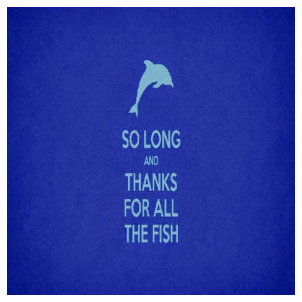

In [3]:
from docarray import DocumentArray, Document
from jina import Flow


doc = DocumentArray([Document(uri='./data/pdf/cats_are_awesome.pdf')])

f = Flow().add(
    uses='jinahub://PDFSegmenter',
)
with f:
    resp = f.post(on='/craft', inputs=doc)
    # print(f'{[c.mime_type for c in resp[0].chunks]}')

resp.summary()
da = DocumentArray([resp[0].chunks[1]]).plot_image_sprites()